## No. of experiments
How many experiments do we need for our tests to have statisticsl significance?

In [11]:
from statsmodels.stats.power import tt_solve_power

x = 0.1 #minimalna wartosc, ktora uznajemy za roznice
y = 0.25 #odchylenie ztandardowe takie jakie zakladamy ze bedzie
effect_size = x/y
tt_solve_power(effect_size=effect_size, alpha=0.05, power=0.95)

83.16424747889013

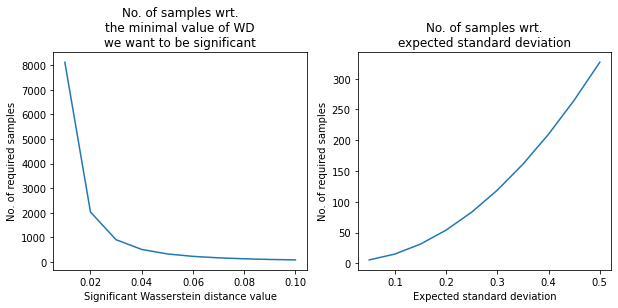

In [52]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.01, 0.1, 10)
Y = np.linspace(0.05, 0.5, 10)
d1 = [tt_solve_power(effect_size=x/0.25, alpha=0.05, power=0.95) for x in X]
d2 = [tt_solve_power(effect_size=0.1/y, alpha=0.05, power=0.95) for y in Y]

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(X, d1)
ax[0].set_xlabel("Significant Wasserstein distance value")
ax[0].set_ylabel("No. of required samples")
ax[0].set_title("No. of samples wrt.\nthe minimal value of WD\nwe want to be significant")
ax[1].plot(Y, d2)
ax[1].set_title("No. of samples wrt.\nexpected standard deviation")
ax[1].set_xlabel("Expected standard deviation")
ax[1].set_ylabel("No. of required samples");

Text(0.5, 1.0, 'No. of samples wrt.\nthe effect size')

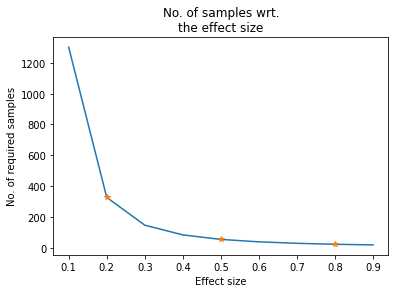

In [53]:
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

D = np.linspace(0.1, 0.9, 9)
d3 = [tt_solve_power(effect_size=d, alpha=0.05, power=0.95) for d in D]
plt.plot(D, d3)
plt.plot([0.2, 0.5, 0.8], [d3[1], d3[4], d3[7]], "*")
plt.xlabel("Effect size")
plt.ylabel("No. of required samples")
plt.title("No. of samples wrt.\nthe effect size")

## Comparison of multiple datasets

In [62]:
import pandas as pd
import seaborn as sns

In [77]:
def plot_difference_in_datasets(datasets, names=None):
    datasets_df = [pd.read_csv(d) for d in datasets]
    
    if not names:
        names = ["".join(d.split("_")[-2:])[:-4] for d in datasets]

    df = pd.DataFrame()
    for d, n in zip(datasets_df, names):
        df[n] = d['wd_diff']
    
    figsize = int(len(datasets_df)*1.4)
    fig = plt.figure(figsize=(figsize,6))
    df.boxplot()
    plt.show()

    fig = plt.figure(figsize=(figsize,6))
    sns.violinplot(data=df)
    plt.show()

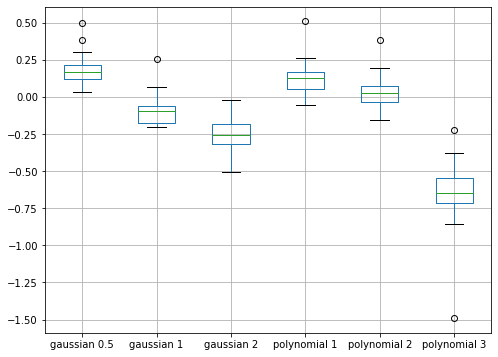

C:\Users\annaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


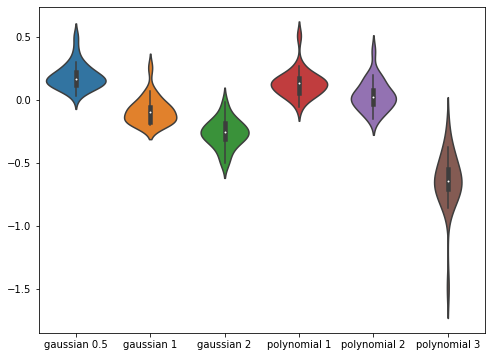

In [78]:
d1 = "./results/exp4_nocat_gaussian_0.5.csv"
d2 = "./results/exp4_nocat_gaussian_1.csv"
d3 = "./results/exp4_nocat_gaussian_2.csv"
d4 = "./results/exp4_nocat_polynomial_1.csv"
d5 = "./results/exp4_nocat_polynomial_2.csv"
d6 = "./results/exp4_nocat_polynomial_3.csv"

datasets = [d1, d2, d3, d4, d5, d6]
names = ["gaussian 0.5", "gaussian 1", "gaussian 2", "polynomial 1", "polynomial 2", "polynomial 3"]

plot_difference_in_datasets(datasets, names)

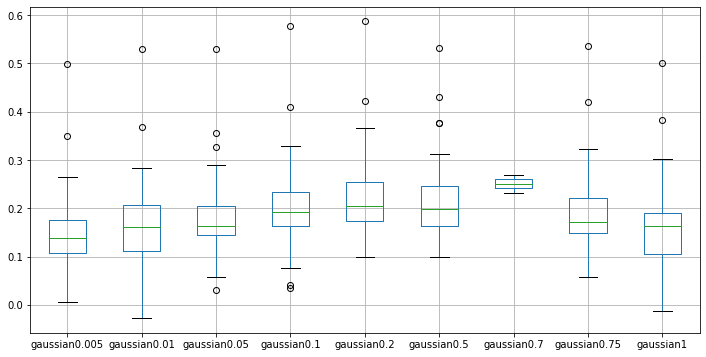

C:\Users\annaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


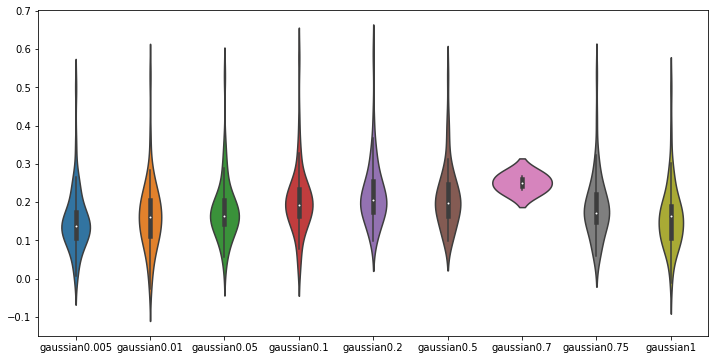

In [79]:
import os

bank_datasets = ["./results/"+f for f in os.listdir("./results")[:-1] if f.startswith("exp5")]
plot_difference_in_datasets(bank_datasets)